#  Types of supervised learning

Motivation:
- **Regression problems** are supervised learning problems to Predict a continuous response.
- **Classification problems** are supervised learning problems Predict a categorical response.
- **Linear regression** is a technique that is useful for regression problems.

# Linear Regression on US Housing Price

* load the Python libraries needed for this case study and run the code below to load the Boston housing dataset.

# Import packages and dataset

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
!pwd

/cygdrive/c/Users/Mohamed/1Uminho/Folder1-tutorial


In [3]:
# ---------DATASET----------#

from datetime import *

start=datetime.now()

# -----------------------------
# Load CSV using Pandas
from pandas import read_csv

filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, delim_whitespace=True, names=names)

print ("execution time of import data: ",datetime.now()-start)

execution time of import data:  0:00:02.099742


* We are using pandas to load the data. 
* We will also use pandas next to explore the data both with descriptive statistics and data visualization.

# Dimension and Descriptive statistics

## display dataset

In [4]:
# check the shape of the DataFrame (rows, columns)
df.shape

(506, 14)

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


The features are :
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'


'MEDV' is the response

Because the response variable is continuous, this is a regression problem.
There are 506 observations (represented by the rows), and each observation is a single market.

In [7]:
df.isnull().values.any()

False

## Description
**'describe()' method to get the statistical summary of the various features of the data set

In [8]:
df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


## Correlation

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


This is interesting. We can see that many of the attributes have a strong correlation (e.g.
- **( > 0:70 or < -0:70).**
For example:
  NOX and INDUS with 0.77.
DIS and INDUS with -0.71.
TAX and INDUS with 0.72.
AGE and NOX with 0.73.
DIS and NOX with -0.78.
It also looks like LSTAT has a good negative correlation with the output variable MEDV with
a value of -0.74.

In [11]:
corr_matrix = df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## visualize
- Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, which plots every numerical attribute against every other numerical attribute.¶

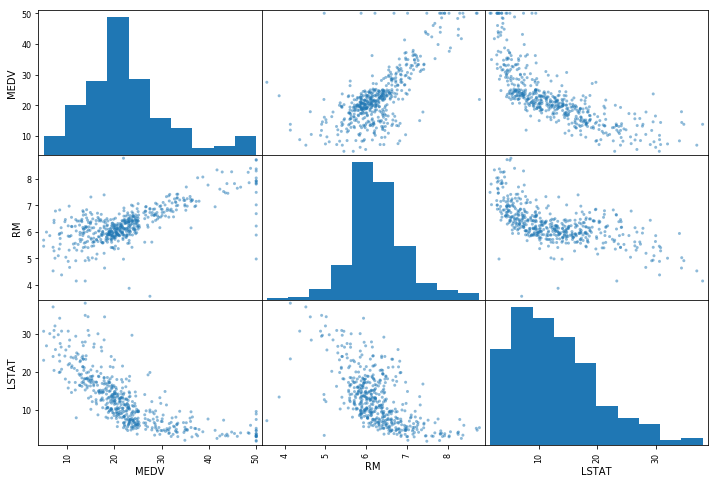

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "LSTAT"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

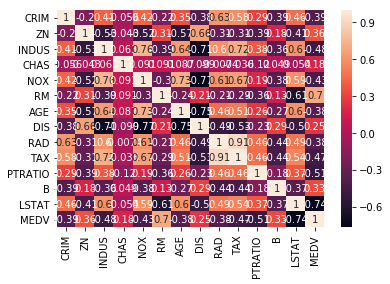

In [13]:
from matplotlib import pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


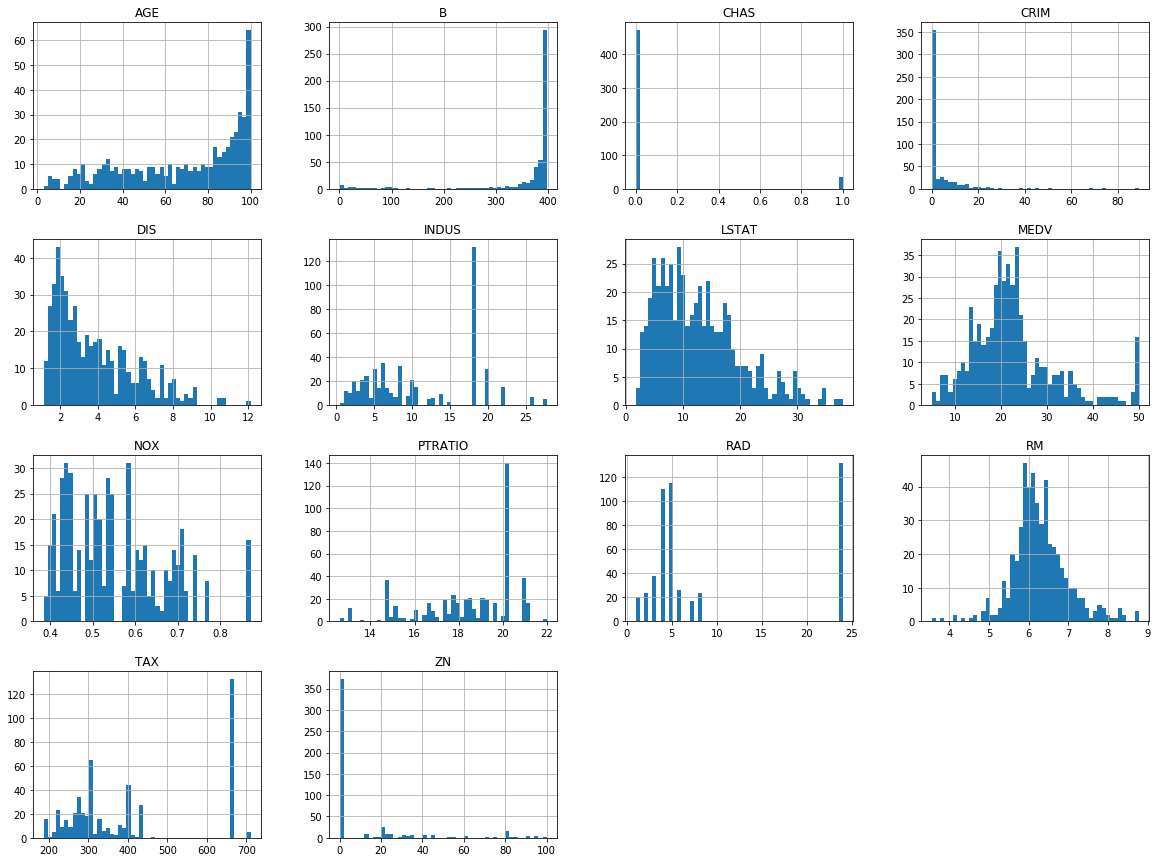

In [15]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

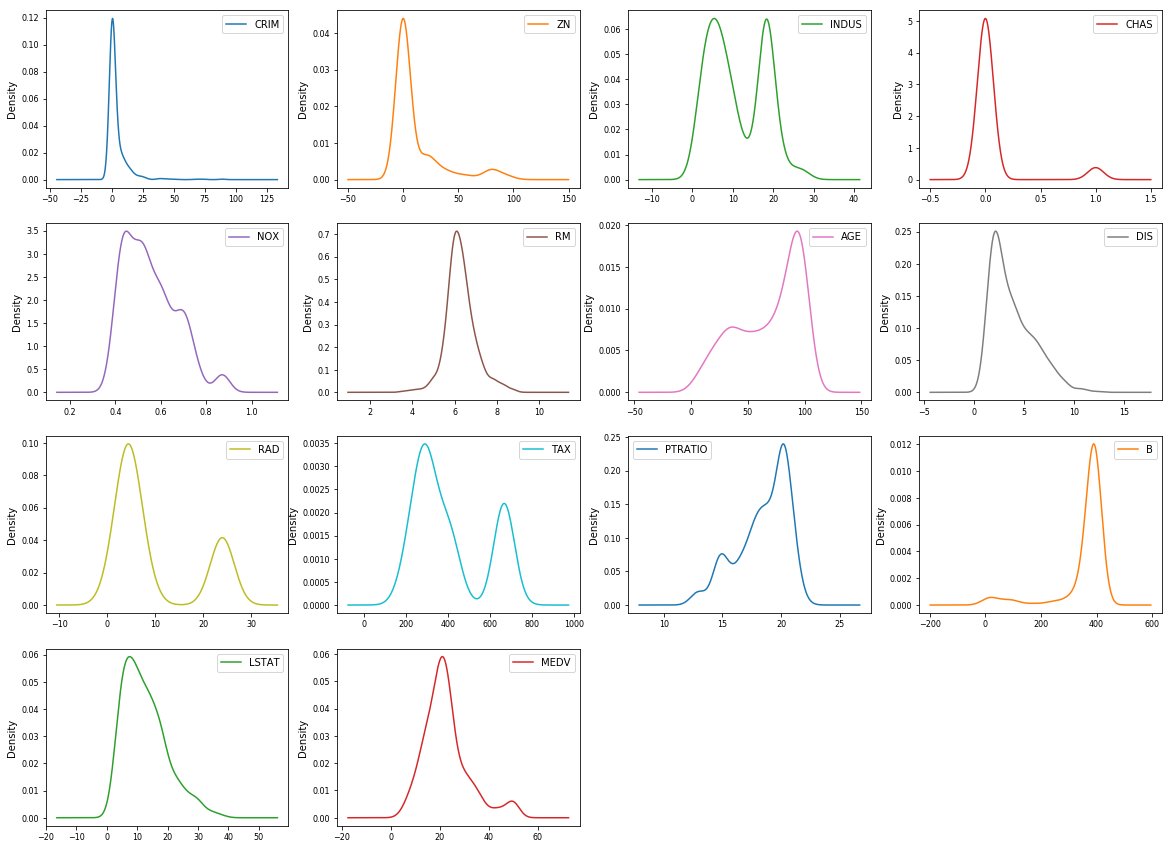

In [16]:
# box and whisker plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8,figsize=(20,15))
plt.show()

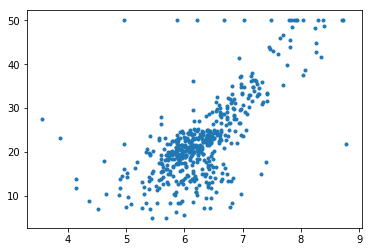

In [17]:

plt.plot(df['RM'],df['MEDV'],'.')
plt.show()


C:\Users\Mohamed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mohamed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


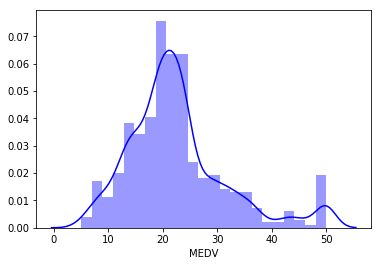

In [18]:
#Distribution plot
sns.distplot(df['MEDV'], color='b')
plt.show()

# Developing a Model : fit and training

## Feature and variable sets

In [19]:
prices = df['MEDV']
features = df.drop(['MEDV'], axis = 1)

In [20]:
prices.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [21]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## 1. Prepare Data: Test-train split
**Import train_test_split function from scikit-learn

In [22]:
from sklearn.model_selection import train_test_split
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=validation_size, random_state=seed)


## Check the size and shape of train/test splits 

In [23]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",Y_train.shape)
print("Test variable set size:",Y_test.shape)

Training feature set size: (404, 13)
Test feature set size: (102, 13)
Training variable set size: (404,)
Test variable set size: (102,)


In [24]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188.0,19.1,389.15,14.37
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352.0,18.8,364.61,12.67
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94


In [25]:
Y_train.head()

355    20.6
460    16.4
120    22.0
346    17.2
457    13.5
Name: MEDV, dtype: float64

## Import linear regression model estimator from scikit-learn and instantiate

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# X_test.head(), # Y_test[10:16]

In [28]:
print(regressor.predict(X_test[10:16]))

[ 6.11177952 32.65621834 18.81377591 19.9985543  37.32169943 22.64542356]


# Model evaluation and metrics 
* Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. 
* Instead, we need evaluation metrics designed for comparing continuous values.

## Model  Evaluation : coefficients

In [29]:
#print the intercept
# print(lm.intercept_)
print(regressor.intercept_)

23.55424546759322


In [30]:
#Coefficients
coeff_df = pd.DataFrame(regressor.coef_,features.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.124649
ZN,0.030474
INDUS,0.021799
CHAS,2.792258
NOX,-15.213525
RM,5.272493
AGE,-0.011058
DIS,-1.273209
RAD,0.265805
TAX,-0.011504


## More metrics for regression
* Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. 
* Instead, we need evaluation metrics designed for comparing continuous values.

## R squared on:  X_test

In [31]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % np.sqrt(regressor.score(X_test,Y_test)))

Liner Regression R squared: 0.7606


plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('MEDV vs RM (Training set)')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

* Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

* Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

## Calculate MAE; MSE and RMSE

In [32]:
# Calculate (MSE) and root-mean-square error (RMSE)
# RMSE is interpretable in the "y" units.
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

print("Mean absolute error (MAE): %.4f" %  metrics.mean_absolute_error(Y_test,y_pred))
print("Mean square error (MSE): %.4f" %  metrics.mean_squared_error(Y_test,y_pred))
print("Root mean square error (RMSE): %.4f" %  np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean absolute error (MAE): 3.7808
Mean square error (MSE): 34.0565
Root mean square error (RMSE): 5.8358


## Save the model

In [33]:
# Save the trained model to a file so we can use it in other programs:for deployement with Flask to Heroku
from sklearn.externals import joblib
joblib.dump(regressor, 'house_regressor_model.pkl')

['house_regressor_model.pkl']

- **regressor = joblib.load(regressor, 'house_regressor_model.pkl')**

# with STATMODEL

In [34]:
import statsmodels.api as sm
# create a fitted model & print the summary
X_train = sm.add_constant(X_train)
lm = sm.OLS(Y_train, X_train).fit()
print (lm.summary())

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     100.4
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          1.40e-115
Time:                        14:10:14   Log-Likelihood:                -1174.7
No. Observations:                 404   AIC:                             2377.
Df Residuals:                     390   BIC:                             2433.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5542      5.656      4.164      0.0

In [35]:
# print the R-squared value for the model
lm.rsquared

0.7698532963729758

In [36]:
import statsmodels.api as sm
# create a fitted model & print the summary
features = sm.add_constant(features)
lm = sm.OLS(prices, features).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        14:10:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## With 2 attributes MEDV vs RM

In [37]:
RM = df['RM']
RM = np.transpose(np.atleast_2d(RM))

In [38]:
from sklearn.metrics import r2_score
regress = LinearRegression()
regress.fit(RM, prices)

pred = regress.predict(RM)

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(prices, pred))))
print('')
print('R2-squared on training, {:.2}'.format(r2_score(prices, pred)))
print('')


RMSE on training, 6.6

R2-squared on training, 0.48



Text(0.5,0,'RM')

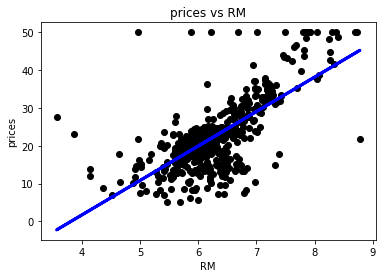

In [39]:
# plotting fitted line
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(RM, prices, color='black')
plt.plot(RM, regress.predict(RM), color='blue', linewidth=3)
plt.title('prices vs RM')
plt.ylabel('prices')
plt.xlabel('RM')

In [40]:
print ("coefficients: %s\nintercept: %0.3f" % \
(regress.coef_,regress.intercept_))

coefficients: [9.10210898]
intercept: -34.671


## with STATMODEL

In [41]:
X = df[["RM"]]
y = df["MEDV"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        14:10:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With 3 attributes MEDV vs RM , LSTAT

In [42]:
X = df[["RM","LSTAT"]]
y = df["MEDV"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          7.01e-112
Time:                        14:10:17   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpreting the Output R-squared

- **We can see here that this model (with 3 attributes) has a good R-squared value — 0.639, meaning that this model explains 64% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be  higher.**


- **This was the example of both single and multiple linear regression in Statsmodels. We could have used as little or as many variables we wanted in our regression model(s):**

— ** up to all the 13 attributes:  R-squared value = 0.770.**

— **for 2 attributes:  R-squared value = 0.484.**


# Evaluate Algorithms

In [43]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error


In [44]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RidgeCV', RidgeCV()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))



In [45]:
# evaluate each model in turn
results = []
names = []
print ("   Model             MSE                  Std    ")
print ("---------------------------------------------------")
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
	results.append(cv_results)
	names.append(name)
	msg = "%8s:           %.2f            (%.2f)  " % (name, cv_results.mean(), cv_results.std())
	print(msg)


   Model             MSE                  Std    
---------------------------------------------------
      LR:           -21.38            (9.41)  
   LASSO:           -26.42            (11.65)  
 RidgeCV:           -21.38            (9.42)  
      EN:           -27.50            (12.31)  
     KNN:           -41.90            (13.90)  
    CART:           -21.04            (8.60)  


- **It looks like LR and RidgeCV  have the lowest MSE.**

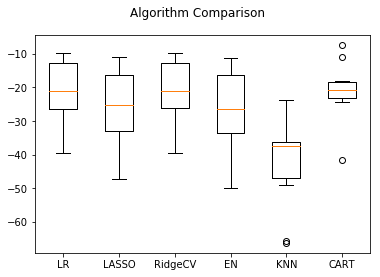

In [46]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [47]:
# evaluate with R2
results = []
names = []
print ("   Model            R2  ")
print ("---------------------------------------------------")
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
	results.append(cv_results)
	names.append(name)
	msg = "%8s:           %.2f  " % (name, cv_results.mean())
	print(msg)


   Model            R2  
---------------------------------------------------
      LR:           0.75  
   LASSO:           0.69  
 RidgeCV:           0.75  
      EN:           0.68  
     KNN:           0.43  
    CART:           0.68  


- **It looks likeLR and RidgeCV  have the Highest R2, followed closely by EN.**

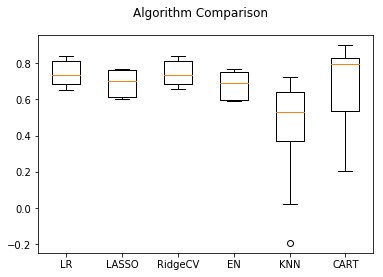

In [48]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [53]:
# np.mean(cross_val_score(RidgeCV(), X_train, Y_train, scoring='neg_mean_squared_error'))

In [52]:
# np.mean(cross_val_score(RidgeCV(), X_train, Y_train, scoring='r2'))